## solar power prediction with linear regression model


#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

pip install pandas

In [57]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [58]:
# Load the dataset
df= pd.read_csv('Dataset/solarpowergeneration.csv')
#display
df.head()

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                       2.17                               31   
1                       2.31                               27   
2                       3.65                               33   
3                       5.82                               30   
4                       7.73                               27   

   mean_sea_level_pressure_MSL  total_precipitation_sfc  snowfall_amount_sfc  \
0                       1035.0                      0.0                  0.0   
1                       1035.1                      0.0                  0.0   
2                       1035.4                      0.0                  0.0   
3                       1035.4                      0.0                  0.0   
4                       1034.4                      0.0                  0.0   

   total_cloud_cover_sfc  high_cloud_cover_high_cld_lay  \
0                    0.0                              0   
1                    0.0                              0   
2                    0.0                              0   
3                    0.0                              0   
4                    0.0                              0   

   medium_cloud_cover_mid_cld_lay  low_cloud_cover_low_cld_lay  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   

   shortwave_radiation_backwards_sfc  ...  wind_direction_10_m_above_gnd  \
0                               0.00  ...                         312.71   
1                               1.78  ...                         294.78   
2                             108.58  ...                         270.00   
3                             258.10  ...                         323.13   
4                             375.58  ...                          10.01   

   wind_speed_80_m_above_gnd  wind_direction_80_m_above_gnd  \
0                       9.36                          22.62   
1                       5.99                          32.74   
2                       3.89                          56.31   
3                       3.55                          23.96   
4                       6.76                          25.20   

   wind_speed_900_mb  wind_direction_900_mb  wind_gust_10_m_above_gnd  \
0               6.62                 337.62                     24.48   
1               4.61                 321.34                     21.96   
2               3.76                 286.70                     14.04   
3               3.08                 339.44                     19.80   
4               6.62                  22.38                     16.56   

   angle_of_incidence     zenith    azimuth  generated_power_kw  
0           58.753108  83.237322  128.33543           454.10095  
1           45.408585  75.143041  139.65530          1411.99940  
2           32.848282  68.820648  152.53769          2214.84930  
3           22.699288  64.883536  166.90159          2527.60920  
4           19.199908  63.795208  182.13526          2640.20340  

[5 rows x 21 columns]

In [59]:
df.tail()

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
4208                       8.69                               66   
4209                       7.57                               90   
4210                       7.27                               90   
4211                       8.25                               81   
4212                       8.00                               80   

      mean_sea_level_pressure_MSL  total_precipitation_sfc  \
4208                       1025.1                      0.0   
4209                       1026.1                      0.0   
4210                       1026.3                      0.1   
4211                       1025.5                      0.0   
4212                       1025.3                      0.0   

      snowfall_amount_sfc  total_cloud_cover_sfc  \
4208                  0.0                  100.0   
4209                  0.0                  100.0   
4210                  0.0                  100.0   
4211                  0.0                  100.0   
4212                  0.0                  100.0   

      high_cloud_cover_high_cld_lay  medium_cloud_cover_mid_cld_lay  \
4208                            100                             100   
4209                             79                             100   
4210                             73                             100   
4211                             74                              66   
4212                            100                             100   

      low_cloud_cover_low_cld_lay  shortwave_radiation_backwards_sfc  ...  \
4208                          100                             257.21  ...   
4209                          100                             210.04  ...   
4210                          100                             113.92  ...   
4211                          100                             186.90  ...   
4212                          100                             172.66  ...   

      wind_direction_10_m_above_gnd  wind_speed_80_m_above_gnd  \
4208                         285.42                      25.50   
4209                           6.91                      13.00   
4210                           2.29                       8.71   
4211                          11.31                       6.29   
4212                          12.72                      12.07   

      wind_direction_80_m_above_gnd  wind_speed_900_mb  wind_direction_900_mb  \
4208                         283.06              24.01                 282.99   
4209                           4.76              11.61                   7.13   
4210                         352.87               7.95                 354.81   
4211                          13.24               5.94                  14.04   
4212                          17.35              11.38                  18.43   

      wind_gust_10_m_above_gnd  angle_of_incidence     zenith    azimuth  \
4208                     25.20           22.700907  64.952098  167.06794   
4209                     10.44           19.307487  63.895118  182.28247   
4210                     22.32           25.249506  65.827032  197.33868   
4211                     15.48           36.361161  70.496313  211.30027   
4212                     16.20           48.452849  76.919574  223.04931   

      generated_power_kw  
4208          173.410560  
4209          403.792220  
4210          158.367780  
4211          126.953060  
4212           20.055031  

[5 rows x 21 columns]

In [60]:
df.shape

(4213, 21)

In [61]:
# display summary
df.describe()

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
count                4213.000000                      4213.000000   
mean                   15.068111                        51.361025   
std                     8.853677                        23.525864   
min                    -5.350000                         7.000000   
25%                     8.390000                        32.000000   
50%                    14.750000                        48.000000   
75%                    21.290000                        70.000000   
max                    34.900000                       100.000000   

       mean_sea_level_pressure_MSL  total_precipitation_sfc  \
count                  4213.000000              4213.000000   
mean                   1019.337812                 0.031759   
std                       7.022867                 0.170212   
min                     997.500000                 0.000000   
25%                    1014.500000                 0.000000   
50%                    1018.100000                 0.000000   
75%                    1023.600000                 0.000000   
max                    1046.800000                 3.200000   

       snowfall_amount_sfc  total_cloud_cover_sfc  \
count          4213.000000            4213.000000   
mean              0.002808              34.056990   
std               0.038015              42.843638   
min               0.000000               0.000000   
25%               0.000000               0.000000   
50%               0.000000               8.700000   
75%               0.000000             100.000000   
max               1.680000             100.000000   

       high_cloud_cover_high_cld_lay  medium_cloud_cover_mid_cld_lay  \
count                    4213.000000                     4213.000000   
mean                       14.458818                       20.023499   
std                        30.711707                       36.387948   
min                         0.000000                        0.000000   
25%                         0.000000                        0.000000   
50%                         0.000000                        0.000000   
75%                         9.000000                       10.000000   
max                       100.000000                      100.000000   

       low_cloud_cover_low_cld_lay  shortwave_radiation_backwards_sfc  ...  \
count                  4213.000000                        4213.000000  ...   
mean                     21.373368                         387.759036  ...   
std                      38.013885                         278.459293  ...   
min                       0.000000                           0.000000  ...   
25%                       0.000000                         142.400000  ...   
50%                       0.000000                         381.810000  ...   
75%                      10.000000                         599.860000  ...   
max                     100.000000                         952.300000  ...   

       wind_direction_10_m_above_gnd  wind_speed_80_m_above_gnd  \
count                    4213.000000                4213.000000   
mean                      195.078452                  18.978483   
std                       106.626782                  11.999960   
min                         0.540000                   0.000000   
25%                       153.190000                  10.140000   
50%                       191.770000                  16.240000   
75%                       292.070000                  26.140000   
max                       360.000000                  66.880000   

       wind_direction_80_m_above_gnd  wind_speed_900_mb  \
count                    4213.000000         4213.00000   
mean                      191.166862           16.36319   
std                       108.760021            9.88533   
min                         1.120000            0.00000   
25%                       130.240000            9.18000   
50%                       187

In [62]:
df.describe

<bound method NDFrame.describe of       temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                          2.17                               31   
1                          2.31                               27   
2                          3.65                               33   
3                          5.82                               30   
4                          7.73                               27   
...                         ...                              ...   
4208                       8.69                               66   
4209                       7.57                               90   
4210                       7.27                               90   
4211                       8.25                               81   
4212                       8.00                               80   

      mean_sea_level_pressure_MSL  total_precipitation_sfc  \
0                          1035.0                      0.0   
1                        

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [64]:
#check for missing value
df.isnull()

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                         False                            False   
1                         False                            False   
2                         False                            False   
3                         False                            False   
4                         False                            False   
...                         ...                              ...   
4208                      False                            False   
4209                      False                            False   
4210                      False                            False   
4211                      False                            False   
4212                      False                            False   

      mean_sea_level_pressure_MSL  total_precipitation_sfc  \
0                           False                    False   
1                           False                    False   
2                           False                    False   
3                           False                    False   
4                           False                    False   
...                           ...                      ...   
4208                        False                    False   
4209                        False                    False   
4210                        False                    False   
4211                        False                    False   
4212                        False                    False   

      snowfall_amount_sfc  total_cloud_cover_sfc  \
0                   False                  False   
1                   False                  False   
2                   False                  False   
3                   False                  False   
4                   False                  False   
...                   ...                    ...   
4208                False                  False   
4209                False                  False   
4210                False                  False   
4211                False                  False   
4212                False                  False   

      high_cloud_cover_high_cld_lay  medium_cloud_cover_mid_cld_lay  \
0                             False                           False   
1                             False                           False   
2                             False                           False   
3                             False                           False   
4                             False                           False   
...                             ...                             ...   
4208                          False                           False   
4209                          False                           False   
4210                          False                           False   
4211                          False                           False   
4212                          False                           False   

      low_cloud_cover_low_cld_lay  shortwave_radiation_backwards_sfc  ...  \
0                           False                              False  ...   
1                           False                              False  ...   
2                           False                              False  ...   
3                           False                              False  ...   
4                           False                              False  ...   
...                           ...                                ...  ...   
4208                        False                              False  ...   
4209                        False                              False  ...   
4210                        False                              False  ...   
4211                        False                              False  ...   
4212                        False                              False  ...   

      wind_direction_10_m_above_gnd  wind

In [65]:
df.isnull().sum()

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64

In [66]:
#duplicate
df.duplicated().sum()

0

In [67]:
df.columns

Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_direction_80_m_above_gnd',
       'wind_speed_900_mb', 'wind_direction_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth',
       'generated_power_kw'],
      dtype='object')

In [68]:
import matplotlib.pyplot as plt

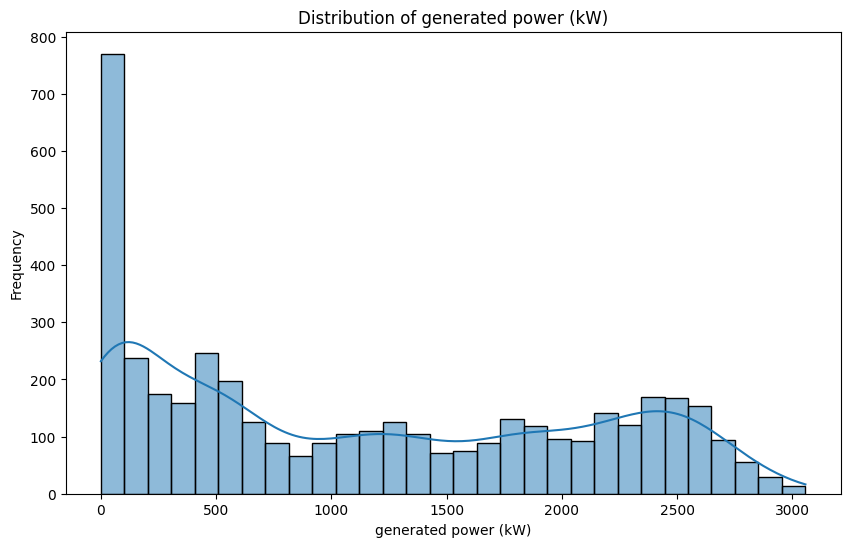

In [69]:
#plot distribution of power
plt.figure(figsize=(10, 6))
sns.histplot(df['generated_power_kw'], bins=30, kde=True)
plt.title('Distribution of generated power (kW)')
plt.xlabel('generated power (kW)')
plt.ylabel('Frequency')
plt.show()

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Preprocess the data
X = df.drop('generated_power_kw', axis=1)
y = df['generated_power_kw']


X = df.drop('generated_power_kw', axis=1)
y = df['generated_power_kw']



In [71]:
# Load the dataset
df = pd.read_csv('Dataset/solarpowergeneration.csv')

# Preprocess the data
X = df.drop('generated_power_kw', axis=1)
y = df['generated_power_kw']


In [72]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [73]:
# Train a random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [74]:
# Make predictions and evaluate the model
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')



Mean Squared Error: 166252.44


In [75]:
# Visualize the predicted solar output
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Solar Output')
plt.ylabel('Predicted Solar Output')
plt.title('Predicted vs. Actual Solar Output')
plt.show()


EDA

array([[<AxesSubplot:title={'center':'temperature_2_m_above_gnd'}>,
        <AxesSubplot:title={'center':'relative_humidity_2_m_above_gnd'}>,
        <AxesSubplot:title={'center':'mean_sea_level_pressure_MSL'}>,
        <AxesSubplot:title={'center':'total_precipitation_sfc'}>,
        <AxesSubplot:title={'center':'snowfall_amount_sfc'}>],
       [<AxesSubplot:title={'center':'total_cloud_cover_sfc'}>,
        <AxesSubplot:title={'center':'high_cloud_cover_high_cld_lay'}>,
        <AxesSubplot:title={'center':'medium_cloud_cover_mid_cld_lay'}>,
        <AxesSubplot:title={'center':'low_cloud_cover_low_cld_lay'}>,
        <AxesSubplot:title={'center':'shortwave_radiation_backwards_sfc'}>],
       [<AxesSubplot:title={'center':'wind_speed_10_m_above_gnd'}>,
        <AxesSubplot:title={'center':'wind_direction_10_m_above_gnd'}>,
        <AxesSubplot:title={'center':'wind_speed_80_m_above_gnd'}>,
        <AxesSubplot:title={'center':'wind_direction_80_m_above_gnd'}>,
        <AxesSubplot:ti

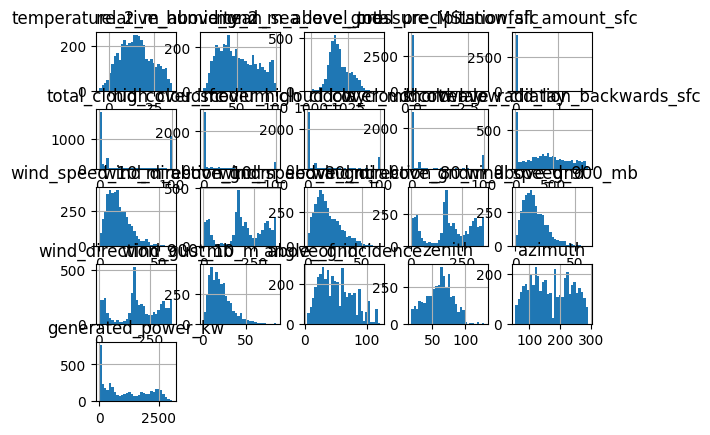

In [76]:
#histograms for remaining column
df.hist(bins=30)

In [77]:
df[df.columns[:9]].hist(bins=30,figsize=(15,10))
plt.show()

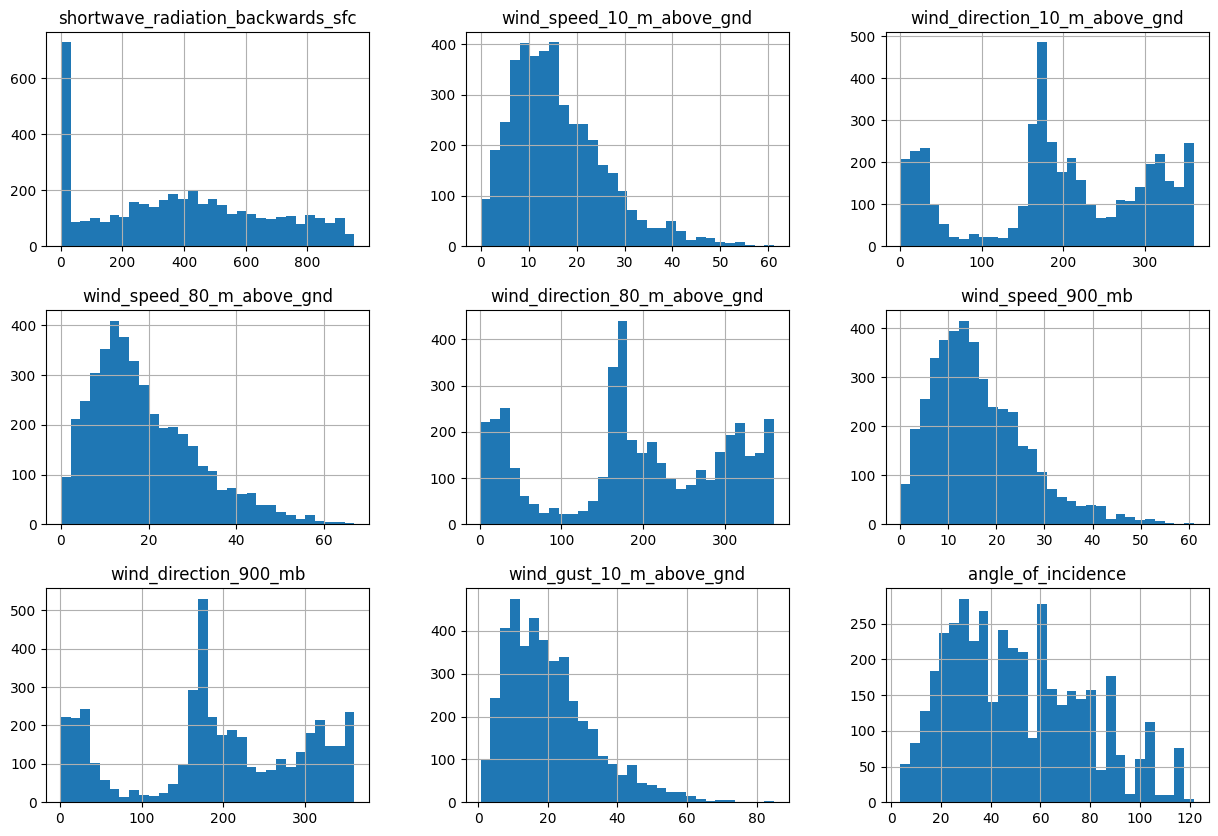

In [78]:
df[df.columns[9:18]].hist(bins=30, figsize=(15,10))
plt.show()

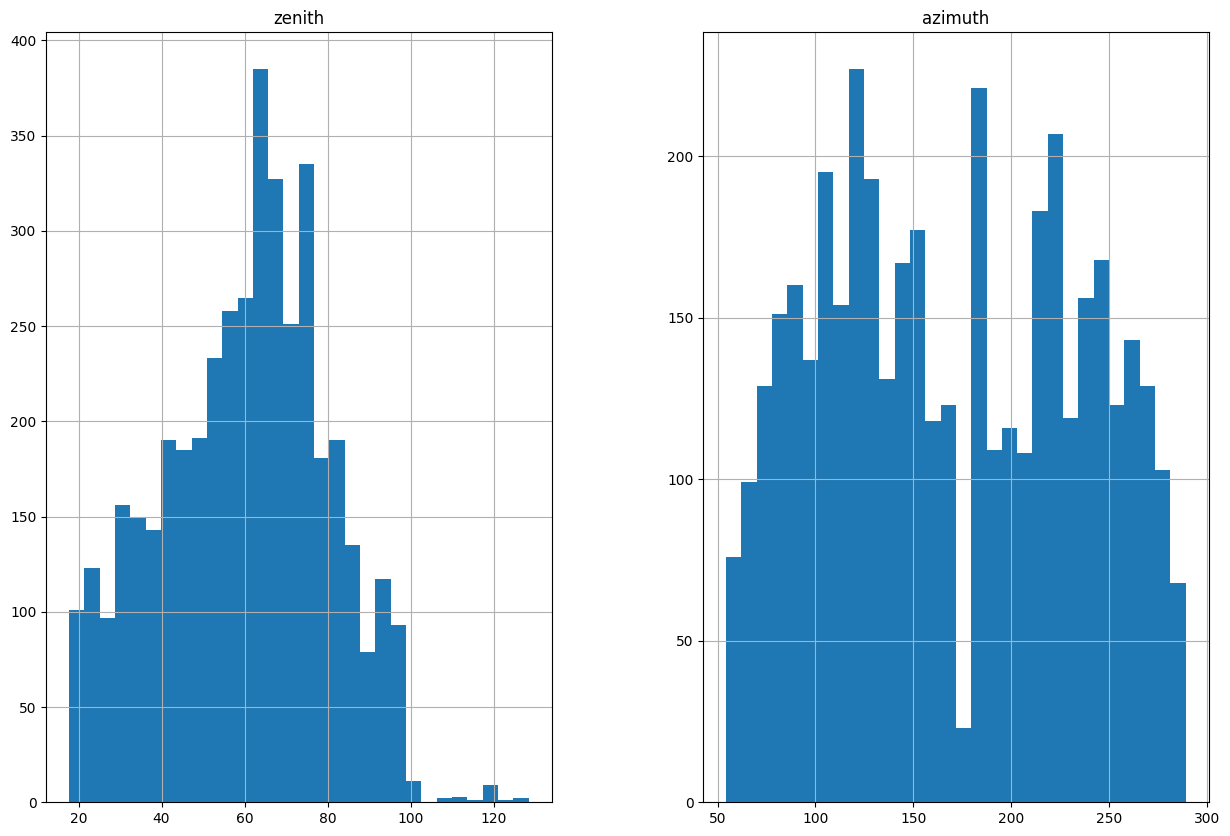

In [79]:
df[df.columns[18:20]].hist(bins=30, figsize=(15,10))
plt.show()

In [80]:
#Bivarient analysis
#scatter plot with target feature
plt.figure(figsize=(15,30))
for i, column in enumerate(df.columns):
    plt.subplot(7,3,i+1)
    plt.scatter(df[column],df['generated_power_kw'])
    plt.title(f'{column} vs generated power (kw)')
    plt.xlabel(column)
    plt.ylabel('generated power (kw)')
plt.tight_layout()
plt.show()


In [81]:
df.corr()

temperature_2_m_above_gnd  \
temperature_2_m_above_gnd                           1.000000   
relative_humidity_2_m_above_gnd                    -0.771704   
mean_sea_level_pressure_MSL                        -0.402240   
total_precipitation_sfc                            -0.083137   
snowfall_amount_sfc                                -0.121422   
total_cloud_cover_sfc                              -0.326641   
high_cloud_cover_high_cld_lay                      -0.019522   
medium_cloud_cover_mid_cld_lay                     -0.100980   
low_cloud_cover_low_cld_lay                        -0.381876   
shortwave_radiation_backwards_sfc                   0.665755   
wind_speed_10_m_above_gnd                          -0.172532   
wind_direction_10_m_above_gnd                       0.051393   
wind_speed_80_m_above_gnd                          -0.244869   
wind_direction_80_m_above_gnd                       0.086630   
wind_speed_900_mb                                  -0.198107   
wind_direction_900_mb                               0.043233   
wind_gust_10_m_above_gnd                           -0.188264   
angle_of_incidence                                 -0.090173   
zenith                                             -0.545646   
azimuth                                             0.381797   
generated_power_kw                                  0.217280   

                                   relative_humidity_2_m_above_gnd  \
temperature_2_m_above_gnd                                -0.771704   
relative_humidity_2_m_above_gnd                           1.000000   
mean_sea_level_pressure_MSL                               0.100529   
total_precipitation_sfc                                   0.168660   
snowfall_amount_sfc                                       0.113987   
total_cloud_cover_sfc                                     0.402895   
high_cloud_cover_high_cld_lay                             0.056452   
medium_cloud_cover_mid_cld_lay                            0.135347   
low_cloud_cover_low_cld_lay                               0.490402   
shortwave_radiation_backwards_sfc                        -0.721754   
wind_speed_10_m_above_gnd                                 0.109674   
wind_direction_10_m_above_gnd                             0.008902   
wind_speed_80_m_above_gnd                                 0.212868   
wind_direction_80_m_above_gnd                            -0.019408   
wind_speed_900_mb                                         0.135464   
wind_direction_900_mb                                     0.021068   
wind_gust_10_m_above_gnd                                  0.144807   
angle_of_incidence                                        0.268460   
zenith                                                    0.513748   
azimuth                                                  -0.525760   
generated_power_kw                                       -0.336783   

                                   mean_sea_level_pressure_MSL  \
temperature_2_m_above_gnd                            -0.402240   
relative_humidity_2_m_above_gnd                       0.100529   
mean_sea_level_pressure_MSL                           1.000000   
total_precipitation_sfc                              -0.159098   
snowfall_amount_sfc                                  -0.053871   
total_cloud_cover_sfc                                -0.151995   
high_cloud_cover_high_cld_lay                        -0.014646   
medium_cloud_cover_mid_cld_lay                       -0.129812   
low_cloud_cover_low_cld_lay                          -0.162043   
shortwave_radiation_backwards_sfc                    -0.188387   
wind_speed_10_m_above_gnd                            -0.170199   
wind_direction_10_m_above_gnd                        -0.119867   
wind_speed_80_m_above_gnd                            -0.131442   
wind_direction_80_m_above_gnd                        -0.161020   
wind_speed_900_mb                                    -0.145696   
wind_direction_900_mb        

<AxesSubplot:>

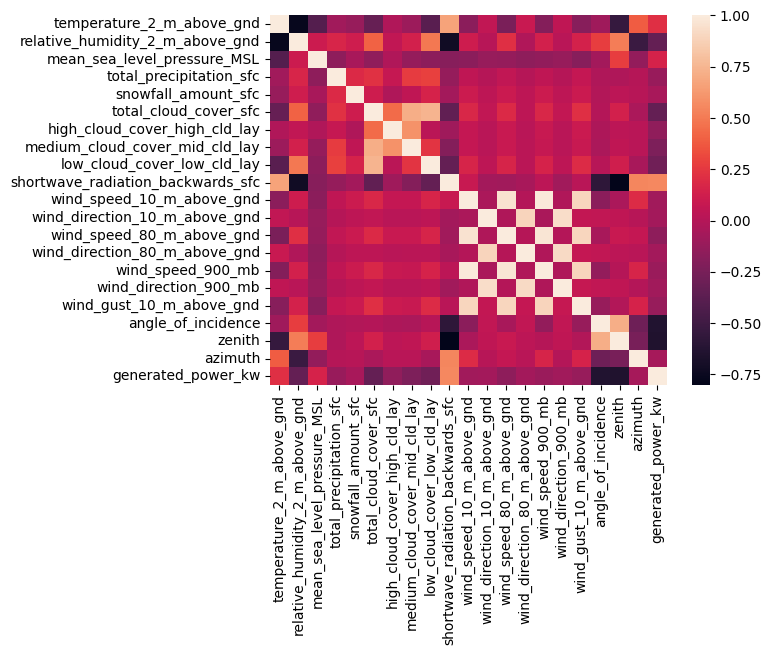

In [82]:
sns.heatmap(df.corr())

In [83]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

<AxesSubplot:>

In [84]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f')

<AxesSubplot:>

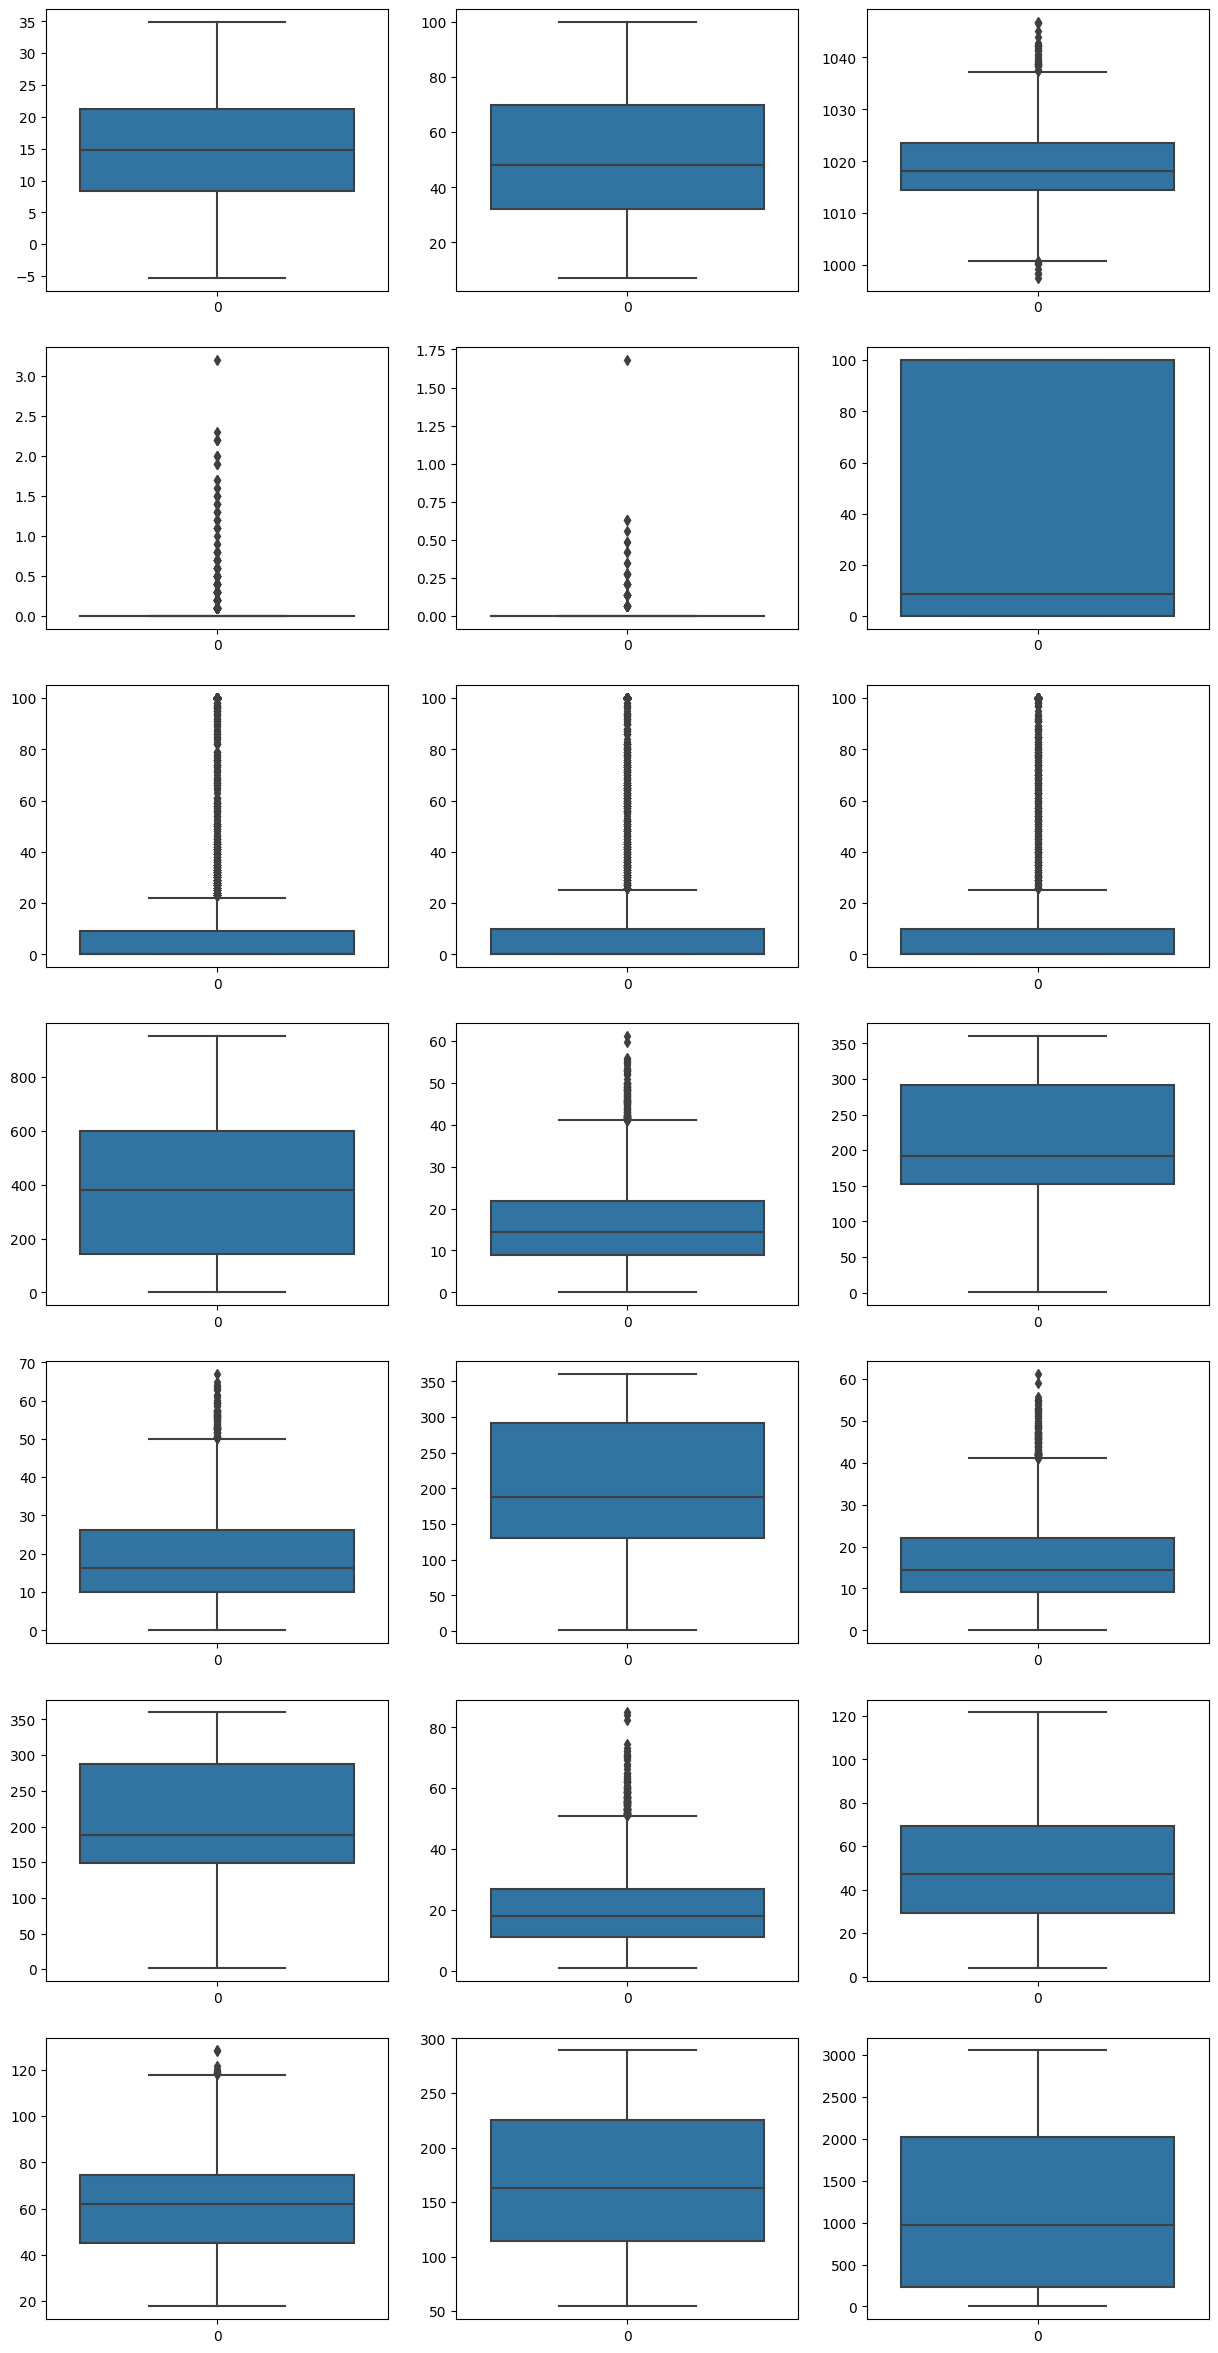

In [85]:
#outlier
plt.figure(figsize=(15,30))
for i,column in enumerate(df.columns):
    plt.subplot(7,3,i+1)
    sns.boxplot(df[column])
plt.show()

In [86]:
import plotly.express as px


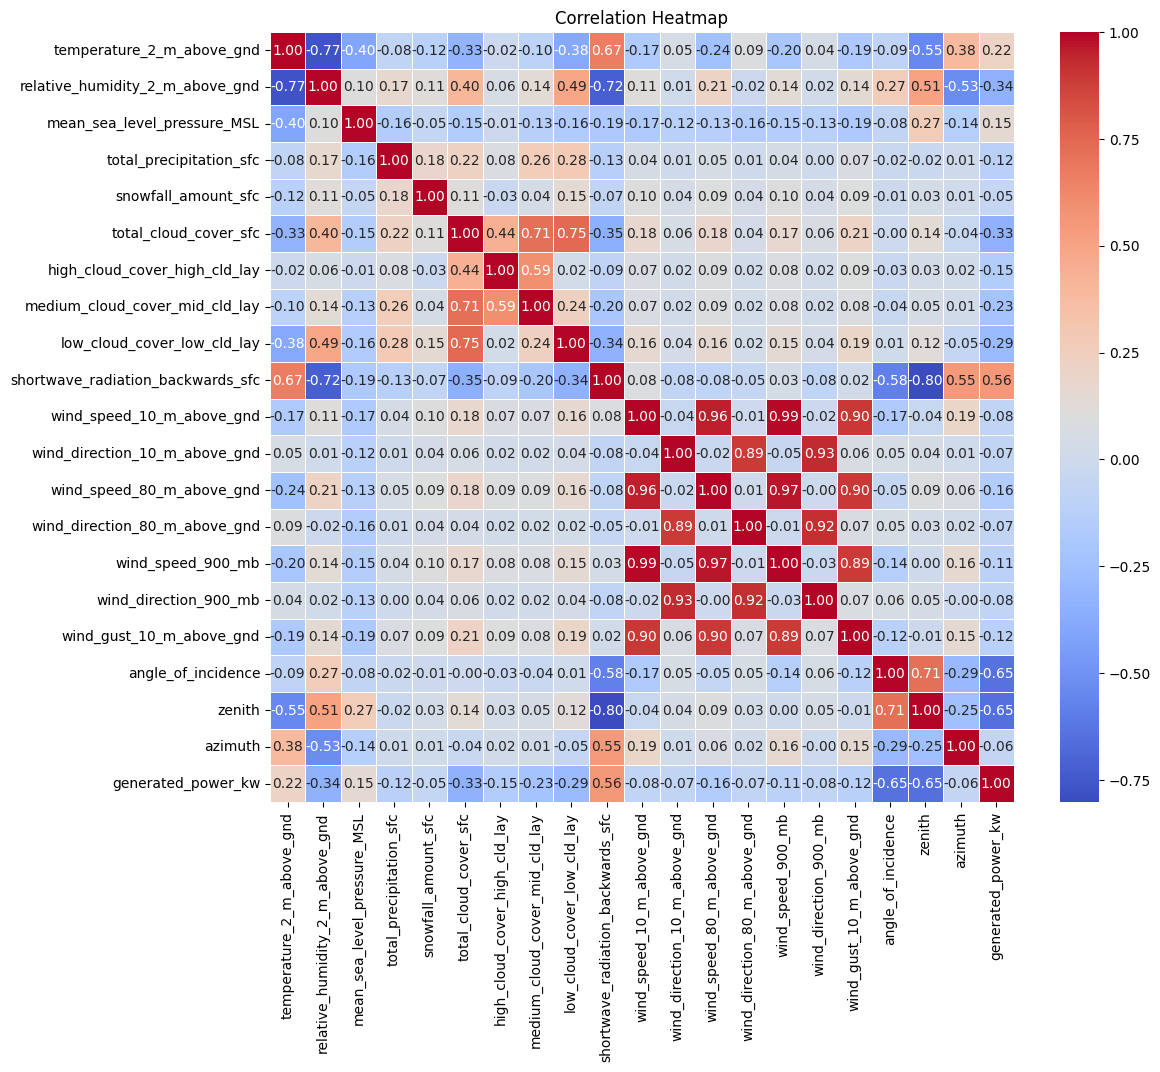

In [87]:
# Customized heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap')
plt.show()


In [88]:
#Interactive Visualization of scatter plot
fig = px.scatter(df, x=df.columns, y='generated_power_kw')
fig.update_layout(title='Scatter Plot of Variables vs Generated Power',
                   xaxis_title='Variables',
                   yaxis_title='Generated Power (kW)')
fig.show()


In [89]:
#Robust Outlier detection
import scipy.stats as stats
for column in df.columns:
    z_scores = stats.zscore(df[column])
    abs_z_scores = abs(z_scores)
    filtered_entries = (abs_z_scores < 3)
    df_without_outliers = df[column][filtered_entries]
    print(f'Outliers in {column}: {len(df[column]) - len(df_without_outliers)}')



Outliers in temperature_2_m_above_gnd: 0
Outliers in relative_humidity_2_m_above_gnd: 0
Outliers in mean_sea_level_pressure_MSL: 17
Outliers in total_precipitation_sfc: 66
Outliers in snowfall_amount_sfc: 36
Outliers in total_cloud_cover_sfc: 0
Outliers in high_cloud_cover_high_cld_lay: 0
Outliers in medium_cloud_cover_mid_cld_lay: 0
Outliers in low_cloud_cover_low_cld_lay: 0
Outliers in shortwave_radiation_backwards_sfc: 0
Outliers in wind_speed_10_m_above_gnd: 51
Outliers in wind_direction_10_m_above_gnd: 0
Outliers in wind_speed_80_m_above_gnd: 38
Outliers in wind_direction_80_m_above_gnd: 0
Outliers in wind_speed_900_mb: 51
Outliers in wind_direction_900_mb: 0
Outliers in wind_gust_10_m_above_gnd: 48
Outliers in angle_of_incidence: 0
Outliers in zenith: 4
Outliers in azimuth: 0
Outliers in generated_power_kw: 0


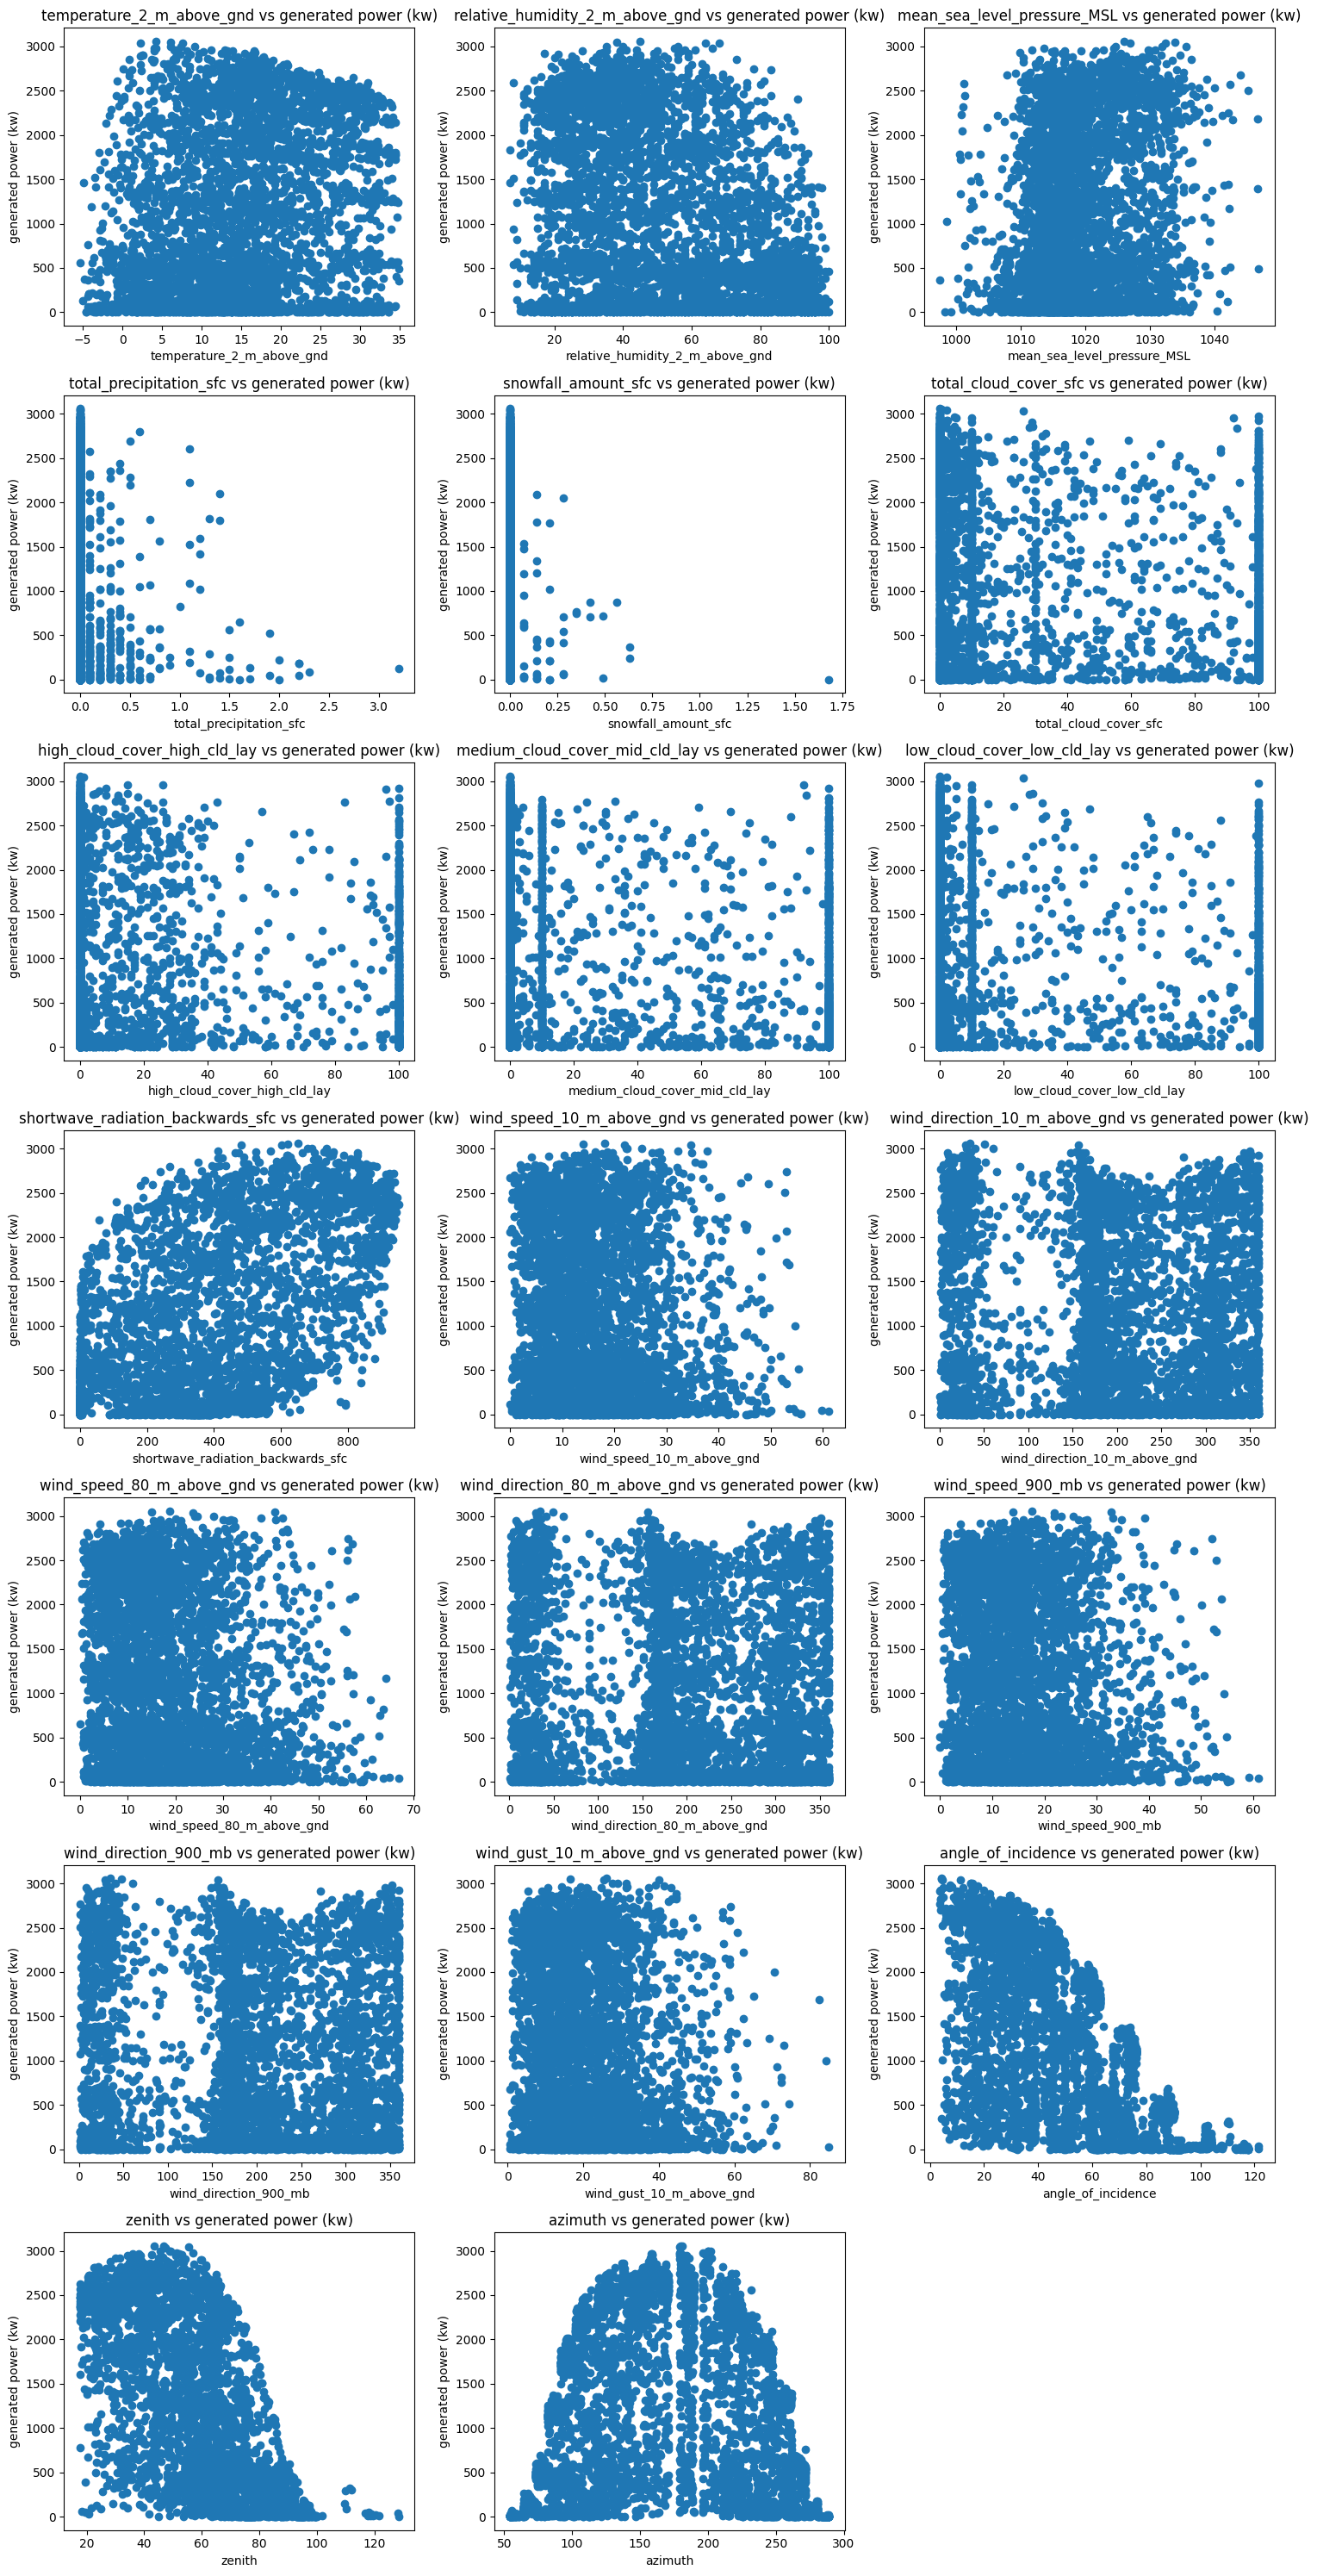

In [90]:
# remove the generated_power_kw vs generated_power_kw graph
plt.figure(figsize=(15,30))
for i, column in enumerate(df.drop('generated_power_kw', axis=1).columns):
    plt.subplot(7,3,i+1)
    plt.scatter(df[column], df['generated_power_kw'])
    plt.title(f'{column} vs generated power (kw)')
    plt.xlabel(column)
    plt.ylabel('generated power (kw)')
plt.tight_layout()
plt.show()


##Let us build ML prediction for solar power output

In [91]:
#linear regression model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [92]:
#splitting the data into features and target variables
X= df.drop('generated_power_kw', axis=1)
y= df['generated_power_kw']

In [93]:
#let us split the data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [94]:
#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [95]:
#Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [96]:
#evaluate the model- test
y_pred= model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print(f"mean Absolute Error on test set:{mae}")

mean Absolute Error on test set:391.7926956840312


In [97]:
y_pred_train= model.predict(X_train_scaled)
mae_train = mean_absolute_error(y_train, y_pred_train)
print(f"mean Absolute Error on Train set: {mae_train}")

mean Absolute Error on Train set: 392.42118159774026


Replaced Linear Regression with Random Forest Regressor

In [122]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Train the model
rf.fit(X_train_scaled, y_train)

# Make predictions on test set
y_pred = rf.predict(X_test_scaled)

# Evaluate the model on test set
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 255.54273257404114


In [100]:
# Make predictions on training set
y_train_pred = rf.predict(X_train_scaled)

# Evaluate the model on training set
mae_train = mean_absolute_error(y_train, y_train_pred)
print(f"Mean Absolute Error on Training Set: {mae_train}")



Mean Absolute Error on Training Set: 99.2574553848151


Improvisation 2: Feature Engineering

In [101]:
# Convert numpy arrays to pandas DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)


In [103]:
# Create new feature: solar_irradiance_squared
X_train_scaled = X_train_scaled.assign(solar_irradiance_squared=X_train_scaled.iloc[:, 0] ** 2)
X_test_scaled = X_test_scaled.assign(solar_irradiance_squared=X_test_scaled.iloc[:, 0] ** 2)


In [104]:
X_train_scaled = X_train_scaled.assign(temperature_cubed=X_train_scaled.iloc[:, 1] ** 3)
X_test_scaled = X_test_scaled.assign(temperature_cubed=X_test_scaled.iloc[:, 1] ** 3)



Scatter plot and heatmap correlation

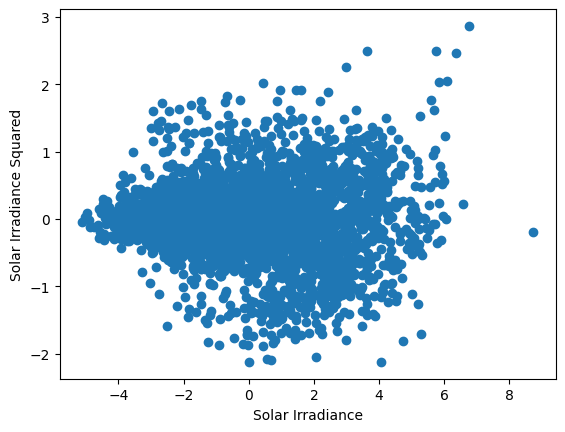

In [110]:
# Plot the relationship between solar_irradiance and solar_irradiance_squared
plt.scatter(X_train_scaled.iloc[:, 0], X_train_scaled.iloc[:, -1])
plt.xlabel('Solar Irradiance')
plt.ylabel('Solar Irradiance Squared')
plt.show()


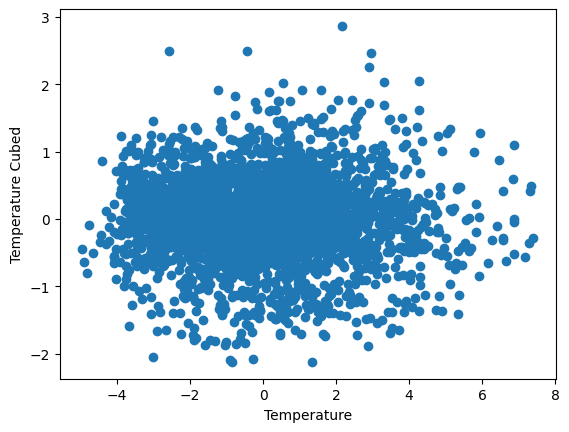

In [111]:
plt.scatter(X_train_scaled.iloc[:, 1], X_train_scaled.iloc[:, -1])
plt.xlabel('Temperature')
plt.ylabel('Temperature Cubed')
plt.show()



In [112]:
#Calculate the correlation matrix
corr_matrix = X_train_scaled.corr()


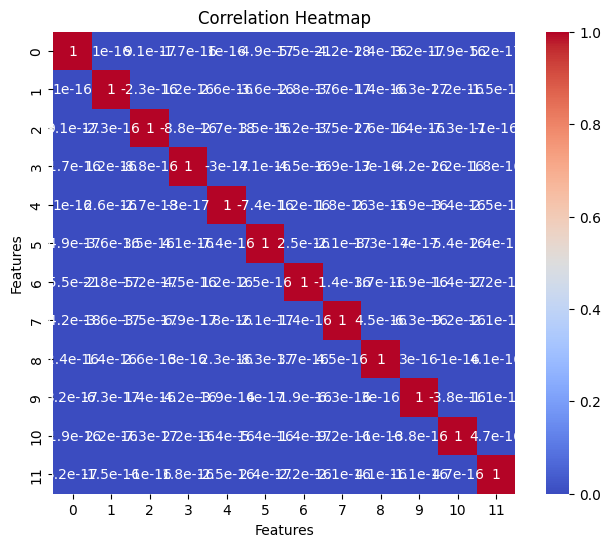

In [113]:
#Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

 Improvisation 3: Advanced Data Preprocessing

In [105]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)


c:\Users\SHREYABHAT\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

c:\Users\SHREYABHAT\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

c:\Users\SHREYABHAT\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



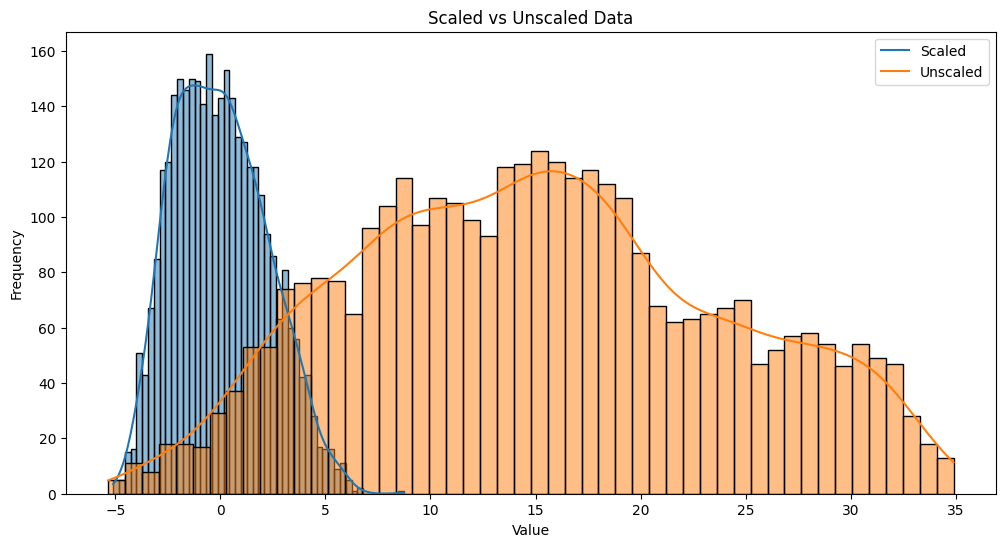

In [114]:
# Plot histograms of scaled and unscaled data
plt.figure(figsize=(12, 6))
sns.histplot(X_train_scaled.iloc[:, 0], bins=50, kde=True)
sns.histplot(X_train.iloc[:, 0], bins=50, kde=True)
plt.title('Scaled vs Unscaled Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(['Scaled', 'Unscaled'])
plt.show()


Improvisation 4: Dimensionality Reduction


In [107]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA(n_components=0.95, random_state=42)

# Fit and transform data
X_train_scaled = pca.fit_transform(X_train_scaled)
X_test_scaled = pca.transform(X_test_scaled)


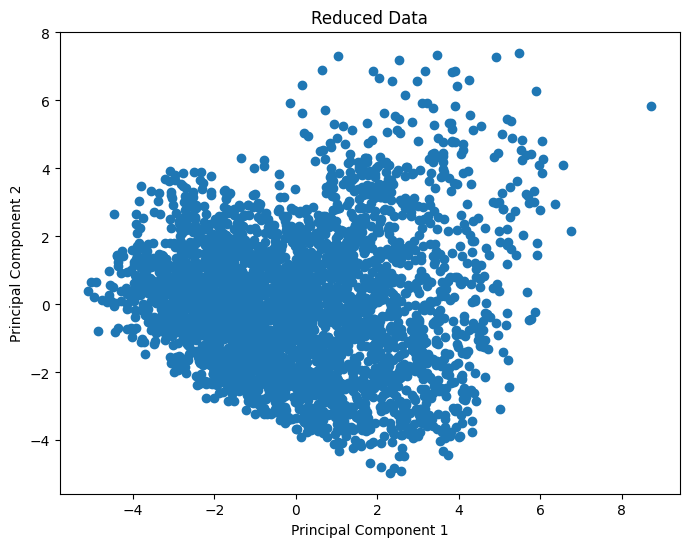

In [121]:
# Apply PCA to the training data
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_train_reduced = pca.fit_transform(X_train_scaled)

# Plot scatter plot of reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1])
plt.title('Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
